<a href="https://colab.research.google.com/github/HAKK1123/HAKK1123/blob/main/%E7%AC%AC1%E5%9B%9E_%E6%8E%A8%E5%AE%9A%E3%81%A8%E6%A4%9C%E5%AE%9A_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`このファイルは「ドライブにコピー」を行なった上で実行してください。`

# 第１回 推定と検定

# インストール

In [ ]:
# Matplotlibの日本語化
!pip install -q japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


# インポート

In [ ]:
# ファイル操作用ライブラリ
import os
# 正規表現用ライブラリ
import re
# 数値計算用ライブラリ
import numpy as np
# テーブルデータ操作用ライブラリ
import pandas as pd
# 描画用ライブラリ
import matplotlib.pyplot as plt
import seaborn as sns
# Matplotlibの日本語化用ライブラリ
import japanize_matplotlib
# 図の基本サイズを設定
plt.rcParams['figure.figsize'] = (15,4)
# 統計関連ライブラリ
from scipy import stats

# データの読み込み

ポケモン完全データセット：[The Complete Pokemon Dataset](https://www.kaggle.com/datasets/rounakbanik/pokemon)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/International_Pok%C3%A9mon_logo.svg/640px-International_Pok%C3%A9mon_logo.svg.png)

In [ ]:
# カレントディレクトリにファイルがなければダウンロード
if not os.path.exists('pokemon.csv'):
    !wget https://raw.githubusercontent.com/swarajpande4/pokemon-analysis/main/dataset/pokemon.csv

--2023-10-24 05:30:26--  https://raw.githubusercontent.com/swarajpande4/pokemon-analysis/main/dataset/pokemon.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160616 (157K) [text/plain]
Saving to: ‘pokemon.csv’

pokemon.csv         100%[===================>] 156.85K  --.-KB/s    in 0.004s  

2023-10-24 05:30:26 (36.7 MB/s) - ‘pokemon.csv’ saved [160616/160616]



In [ ]:
# csvファイルの読み込み
df_pokemon = pd.read_csv('pokemon.csv')

In [ ]:
# japanese_nameから日本語の名前だけを抽出
df_pokemon['japanese_name'] = df_pokemon.japanese_name.apply(lambda x:re.findall(r'[\u30A1-\u30FF]+', x)[0])

In [ ]:
# statusのカラム名を日本語に変換するための辞書
status_dic = {'hp':'HP', 'attack':'こうげき', 'defense':'ぼうぎょ', 'sp_attack':'とくこう', 'sp_defense':'とくぼう', 'speed':'すばやさ'}

# statusのカラム名を日本語に変換
df_pokemon.columns = df_pokemon.columns.map(lambda x:status_dic.get(x, x))

In [ ]:
# type1とtype2を日本語に変換するための辞書
type_dict = {'grass':'くさ', 'fire':'ほのお', 'water':'みず', 'bug':'むし', 'normal':'ノーマル', 'poison':'どく', 'electric':'でんき', 'ground':'じめん', 'fairy':'フェアリー', 'fighting':'かくとう', 'psychic':'エスパー', 'rock':'いわ', 'ghost':'ゴースト', 'ice':'こおり', 'dragon':'ドラゴン', 'dark':'あく', 'steel':'はがね', 'flying':'ひこう', np.nan:'タイプなし'}

# type1とtype2を日本語に変換
df_pokemon['type1'] = df_pokemon.type1.map(lambda x:type_dict.get(x, x))
df_pokemon['type2'] = df_pokemon.type2.map(lambda x:type_dict.get(x, x))

In [ ]:
# データの確認
df_pokemon.T.head(41)

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
abilities,"['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Blaze', 'Solar Power']","['Blaze', 'Solar Power']","['Blaze', 'Solar Power']","['Torrent', 'Rain Dish']","['Torrent', 'Rain Dish']","['Torrent', 'Rain Dish']","['Shield Dust', 'Run Away']",...,['Shadow Shield'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Prism Armor'],['Soul-Heart']
against_bug,1.0,1.0,1.0,0.5,0.5,0.25,1.0,1.0,1.0,1.0,...,1.0,0.5,0.5,0.5,1.0,0.25,1.0,2.0,2.0,0.25
against_dark,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,2.0,0.5
against_dragon,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.5,0.5,2.0,1.0,0.0
against_electric,0.5,0.5,0.5,1.0,1.0,2.0,2.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,0.5,2.0,0.5,0.5,1.0,1.0
against_fairy,0.5,0.5,0.5,0.5,0.5,0.5,1.0,1.0,1.0,1.0,...,1.0,0.5,2.0,2.0,1.0,0.5,0.5,4.0,1.0,0.5
against_fight,0.5,0.5,0.5,1.0,1.0,0.5,1.0,1.0,1.0,0.5,...,0.0,1.0,0.5,0.5,1.0,1.0,2.0,2.0,0.5,1.0
against_fire,2.0,2.0,2.0,0.5,0.5,0.5,0.5,0.5,0.5,2.0,...,1.0,0.5,2.0,2.0,1.0,2.0,4.0,0.5,1.0,2.0
against_flying,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,0.5,4.0,4.0,0.5,0.5,1.0,1.0,1.0,0.5
against_ghost,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,1.0


# こうげき

以下ではポケモン８００体の「こうげき」能力値を例に、母集団と標本に関わる用語を確認します。<br>
＊余力のある学生は、この章をコピーした後、Pythonスクリプトの「こうげき」と書かれた箇所を「HP」や「ぼうぎょ」に書き換えて実行してみましょう。

## 母集団

- 母集団
  - 興味の対象全体のまとまり

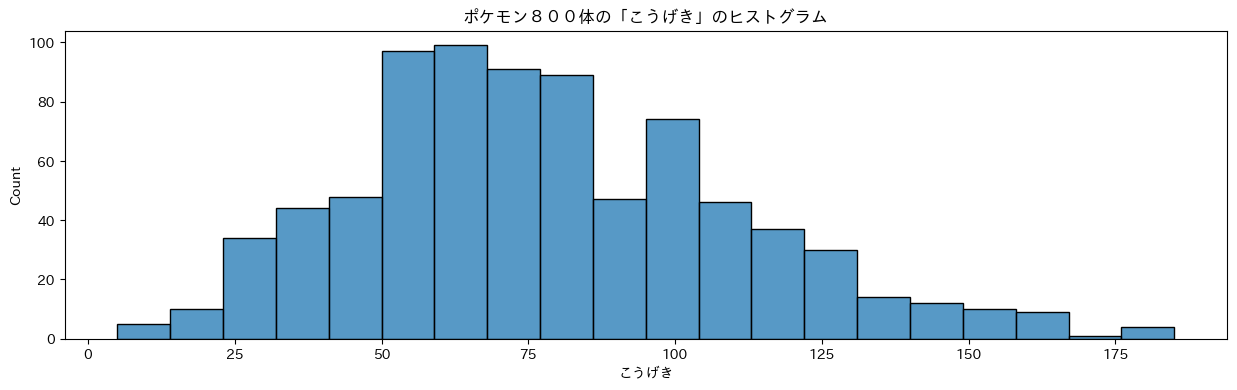

In [ ]:
# ヒストグラムを描画
sns.histplot(data=df_pokemon, x='こうげき', bins=20)
# タイトルを設定
plt.title(f'ポケモン８００体の「こうげき」のヒストグラム')
# Figureオブジェクトを表示
plt.show()

### 母平均 ($\mu$)


- 母集団の平均値
  
  $$　\mu = \frac{1}{N} (x_1 + x_2 + \dots + x_N) = \frac{1}{N} \sum_{i=1}^{N} x_i　$$
ただし, $N$は母集団のサイズである.

In [ ]:
# 母平均
attack_pop_mean = df_pokemon.こうげき.mean()
print(f'母平均：{attack_pop_mean:.1f}')

母平均：77.9


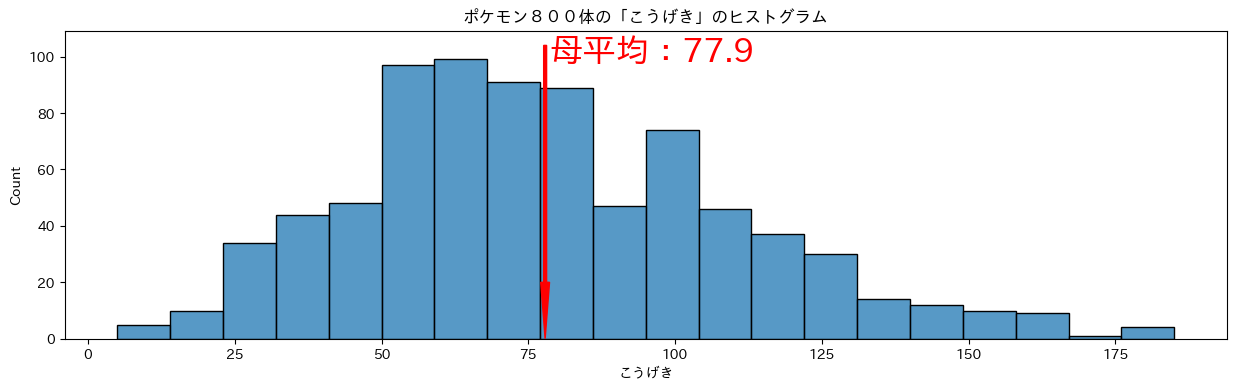

In [ ]:
# ヒストグラムを描画
ax = sns.histplot(data=df_pokemon, x='こうげき', bins=20)
# 母平均の位置を示す矢印を描画
plt.arrow(attack_pop_mean, ax.get_ylim()[1], 0, -ax.get_ylim()[1], length_includes_head=True, color='red', width=.5, head_length=20.0)
# テキストを印字
plt.text(attack_pop_mean*1.01, ax.get_ylim()[1]*.9, f'母平均：{attack_pop_mean:.1f}', color='red', fontsize=24)
# タイトルを設定
plt.title('ポケモン８００体の「こうげき」のヒストグラム')
# Figureオブジェクトを表示
plt.show()

### 母分散 ($\sigma^2$)

- 母集団の分散〜各データの平均値からの散らばり具合

  ＊仮にデータの単位をkm(キロメートル)とした場合、分散の単位は$km^2$（平方キロメートル）（異なる単位）になる点に注意しましょう。

$$\sigma^2 = \frac{1}{N} \{ (x_1 - \mu)^2 + (x_2 -  \mu)^2 + \dots + (x_N - \mu)^2 \} = \frac{1}{N} \sum_{i=1}^{N}(x_i - \mu)^2$$


In [ ]:
# 母分散
attack_pop_var = df_pokemon.こうげき.var(ddof=0)
print(f'母分散：{attack_pop_var:.1f}')

母分散：1032.9


### 母標準偏差 ($\sigma$)


- 母集団の標準偏差〜各データの平均値からの散らばり具合（母分散の正の平方根）

  ＊仮にデータの単位をkm(キロメートル)とした場合、標準偏差の単位は$km$（キロメートル）（同じ単位）になる。

$$\sigma = \sqrt{\sigma^2}$$


In [ ]:
# 母標準偏差
attack_pop_std = df_pokemon.こうげき.std(ddof=0)
print(f'母標準偏差：{attack_pop_std:.1f}')

母標準偏差：32.1


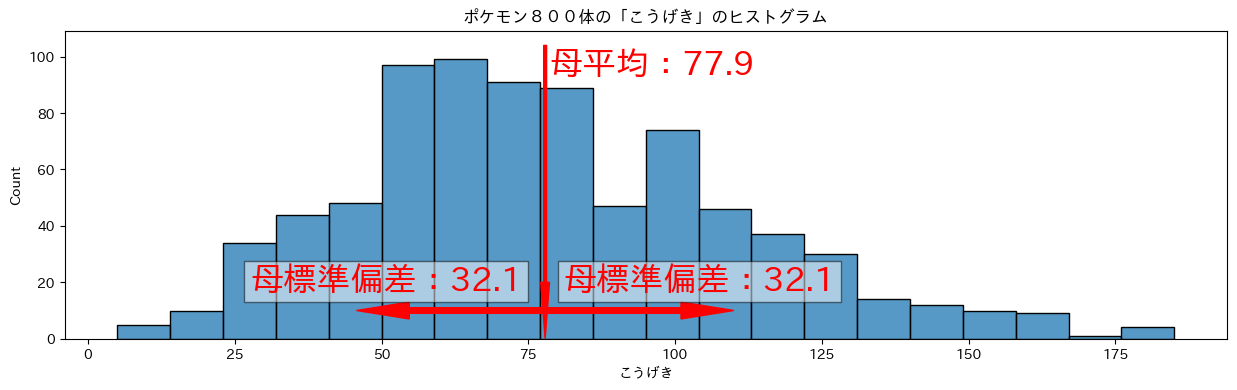

In [ ]:
# ヒストグラムを描画
ax = sns.histplot(data=df_pokemon, x='こうげき', bins=20)
# Axesオブジェクトのy軸の下限と上限を取得
ymin, ymax = ax.get_ylim()
# 母平均の位置を示す矢印を描画
plt.arrow(attack_pop_mean, ymax, 0, -ymax, length_includes_head=True, color='red', width=.5, head_length=20.0)
# テキストを印字
plt.text(attack_pop_mean*1.01, ymax*.9, f'母平均：{attack_pop_mean:.1f}', color='red', fontsize=24)
# 母標準偏差の示す矢印を描画
plt.arrow(attack_pop_mean, 10, attack_pop_std, 0, length_includes_head=True, color='red', width=2)
plt.arrow(attack_pop_mean, 10, -attack_pop_std, 0, length_includes_head=True, color='red', width=2)
# テキストを印字
t = plt.text(attack_pop_mean*1.04, 17, f'母標準偏差：{attack_pop_std:.1f}', color='red', fontsize=24)
# テキストを囲むバウンディングボックスを描画
t.set_bbox(dict(facecolor='w', alpha=0.5))
# テキストを印字
t = plt.text(attack_pop_mean*.95, 17, f'母標準偏差：{attack_pop_std:.1f}', color='red', fontsize=24, horizontalalignment='right')
# テキストを囲むバウンディングボックスを描画
t.set_bbox(dict(facecolor='w', alpha=0.5))
# タイトルを設定
plt.title('ポケモン８００体の「こうげき」のヒストグラム')
# Figureオブジェクトを表示
plt.show()

## 標本と推定量

- 標本
  - 母集団の一部
  - 取得するたび標本の値は変わる
  - 従って標本の値は確率変数になる（確率的に振る舞う）
  - 標本の値は母集団の確率分布に従う


- 推定量
  - 母集団の性質（母平均や母分散など）を推定するための統計量（標本平均、標本分散など）
  - サンプルを取得する度に推定量の値は変わる
  - 従って、推定量は確率変数になる（確率的に振る舞う）


### 標本平均 ($\bar X$)

- 標本の平均値
- 母平均の推定量
  
  $$　\bar X = \frac{1}{n} (X_1 + X_2 + \dots + X_n) = \frac{1}{n} \sum_{i=1}^n X_i　$$

$$ \text{ここで、} n=\text{サンプルサイズ}$$


`セルを実行する度に標本平均の値が変わることを確認しましょう。`

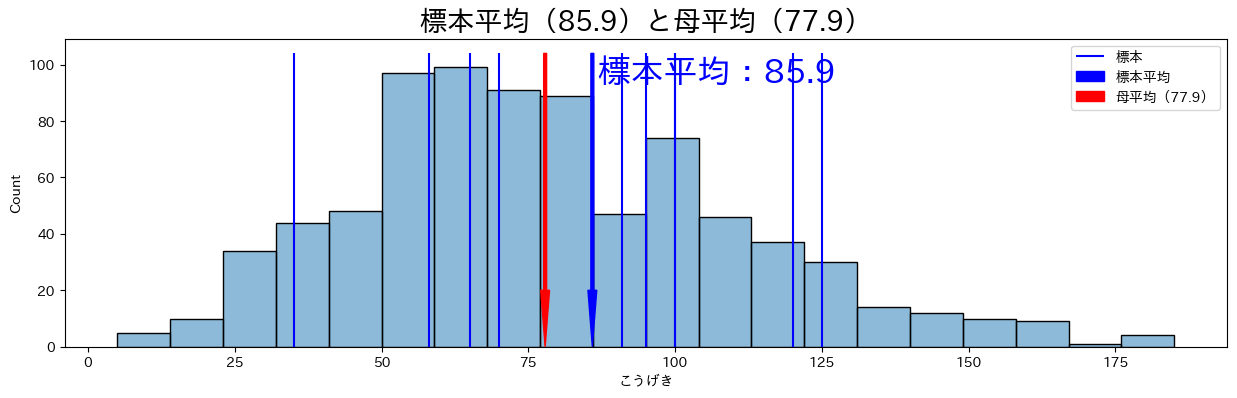

In [ ]:
# 母集団から取り出す標本のサイズ
sample_size = 10
# 母集団からサンプリング
sample = df_pokemon.こうげき.sample(sample_size).values
# ヒストグラムを描画
ax = sns.histplot(data=df_pokemon, x='こうげき', bins=20, alpha=.5)
# Axesオブジェクトのy軸の下限と上限を取得
ymin, ymax = ax.get_ylim()
# 取得された標本の位置を描画
plt.vlines(list(sample), ymin=ymin, ymax=ymax, color='blue', label='標本')
# 標本平均の位置を示す矢印を描画
plt.arrow(sample.mean(), ymax, 0, -ymax, length_includes_head=True, color='blue', width=.5, head_length=20.0, label='標本平均')
# テキストを印字
plt.text(sample.mean()*1.01, ymax*.9, f'標本平均：{sample.mean():.1f}', color='blue', fontsize=24)
# 母平均の位置を示す矢印を描画
plt.arrow(attack_pop_mean, ymax, 0, -ymax, length_includes_head=True, color='red', width=.5, head_length=20.0, label=f'母平均（{attack_pop_mean:.1f}）')
# タイトルを設定
plt.title(f'標本平均（{sample.mean():.1f}）と母平均（{attack_pop_mean:.1f}）', fontsize=20)
# 凡例を表示
plt.legend()
# Figureオブジェクトを表示
plt.show()

### 標本分散 ($S^2$)


 標本の分散
- `標本平均値`($\bar X$)を基準点とした各データの散らばりぐらいをあらわす指標
- 母分散の推定量
   $$S^2 = \frac{1}{n} \{ (X_1 - \bar X)^2 + (X_2 - \bar X)^2 + \dots + (X_n - \bar X)^2 \} = \frac{1}{n} \sum_{i=1}^{n}(X_i - \bar X)^2$$
   $$ \text{ここで、} n=\text{サンプルサイズ}$$

＊ 発展
  - 標本分散は`母平均`($\mu$)を基準点とした各データの散らばり具合ではない。
  - このことから、標本分散は母分散よりも小さい値になる傾向がある。（後述の「不偏性」を参照）
  - ただし、nが十分に大きければ、この違いは無視できるほど小さくなる。


`セルを実行する度に標本分散の値が変わることを確認しましょう。`

In [ ]:
# 母集団から取り出す標本のサイズ
sample_size = 10
# 母集団からサンプリング+標本分散の計算
attack_var_sample = df_pokemon.こうげき.sample(sample_size).var(ddof=0)

print(f'母分散：{attack_pop_var:.1f}')
print(f'標本分散：{attack_var_sample:.1f}')

母分散：1032.9
標本分散：1279.0


### ランダムサンプリング

- 標本を無作為に抽出すること
- 偏ったサンプリングをすると推定量に偏りが生じる(つまり推定を間違える)

`かくとうタイプのモンスターだけからサンプリングすると、標本平均値は高めに出る`

In [ ]:
# 母集団から取り出す標本のサイズ
sample_size = 10
# タイプを指定
type_specification = 'かくとう'
# 母集団からサンプリング+標本分散の計算
attack_mean_sample  = df_pokemon.query('type1 == @type_specification').sample(sample_size).こうげき.mean()

print(f'母平均：{attack_pop_mean:.1f}')
print(f'標本平均：{attack_mean_sample:.1f}')

母平均：77.9
標本平均：91.1


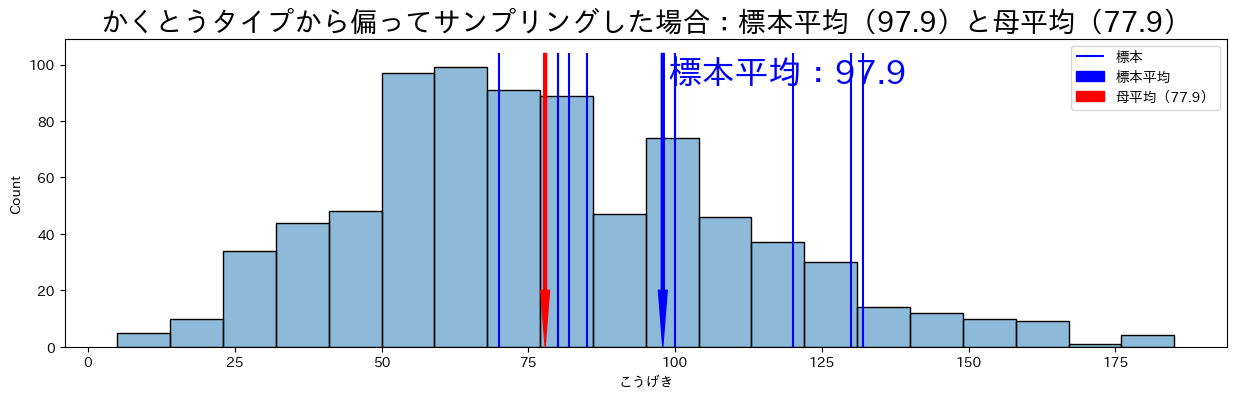

In [ ]:
# 母集団から取り出す標本のサイズ
sample_size = 10
# タイプを指定
type_specification = 'かくとう'
# 母集団からサンプリング
sample = df_pokemon.query('type1 == @type_specification').sample(sample_size).こうげき.values
# ヒストグラムを描画
ax = sns.histplot(data=df_pokemon, x='こうげき', bins=20, alpha=.5)
# Axesオブジェクトのy軸の下限と上限を取得
ymin, ymax = ax.get_ylim()
# 取得された標本の位置を描画
plt.vlines(list(sample), ymin=ymin, ymax=ymax, color='blue', label='標本')
# 標本平均の位置を示す矢印を描画
plt.arrow(sample.mean(), ymax, 0, -ymax, length_includes_head=True, color='blue', width=.5, head_length=20.0, label='標本平均')
# テキストを印字
plt.text(sample.mean()*1.01, ymax*.9, f'標本平均：{sample.mean():.1f}', color='blue', fontsize=24)
# 母平均の位置を示す矢印を描画
plt.arrow(attack_pop_mean, ymax, 0, -ymax, length_includes_head=True, color='red', width=.5, head_length=20.0, label=f'母平均（{attack_pop_mean:.1f}）')
# タイトルを設定
plt.title(f'{type_specification}タイプから偏ってサンプリングした場合：標本平均（{sample.mean():.1f}）と母平均（{attack_pop_mean:.1f}）', fontsize=20)
# 凡例を表示
plt.legend()
# Figureオブジェクトを表示
plt.show()

`フェアリータイプのモンスターだけからサンプリングすると、標本平均値は低めに出る`

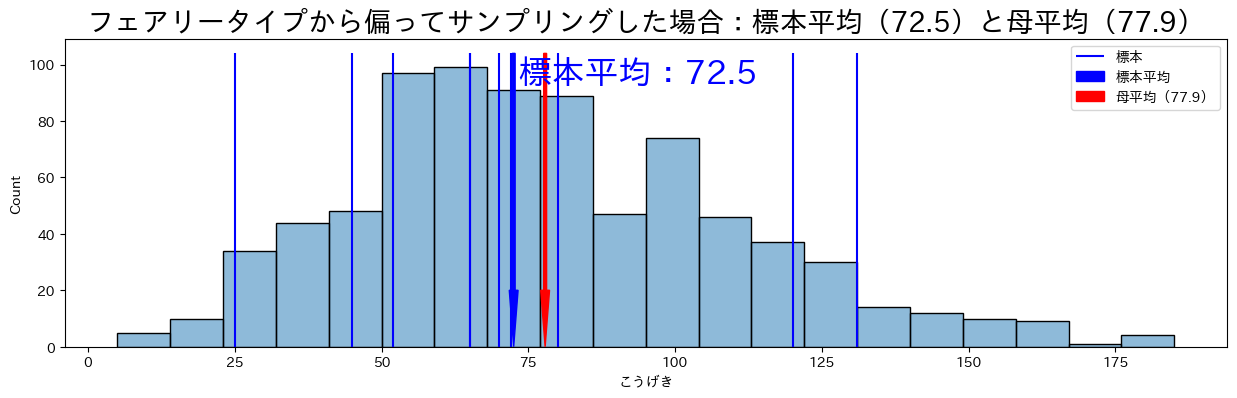

In [ ]:
# 母集団から取り出す標本のサイズ
sample_size = 10
# タイプを指定
type_specification = 'フェアリー'
# 母集団からサンプリング
sample = df_pokemon.query('type1 == @type_specification').sample(sample_size).こうげき.values
# ヒストグラムを描画
ax = sns.histplot(data=df_pokemon, x='こうげき', bins=20, alpha=.5)
# Axesオブジェクトのy軸の下限と上限を取得
ymin, ymax = ax.get_ylim()
# 取得された標本の位置を描画
plt.vlines(list(sample), ymin=ymin, ymax=ymax, color='blue', label='標本')
# 標本平均の位置を示す矢印を描画
plt.arrow(sample.mean(), ymax, 0, -ymax, length_includes_head=True, color='blue', width=.5, head_length=20.0, label='標本平均')
# テキストを印字
plt.text(sample.mean()*1.01, ymax*.9, f'標本平均：{sample.mean():.1f}', color='blue', fontsize=24)
# 母平均の位置を示す矢印を描画
plt.arrow(attack_pop_mean, ymax, 0, -ymax, length_includes_head=True, color='red', width=.5, head_length=20.0, label=f'母平均（{attack_pop_mean:.1f}）')
# タイトルを設定
plt.title(f'{type_specification}タイプから偏ってサンプリングした場合：標本平均（{sample.mean():.1f}）と母平均（{attack_pop_mean:.1f}）', fontsize=20)
# 凡例を表示
plt.legend()
# Figureオブジェクトを表示
plt.show()

 タイプ別の「こうげき」の分布

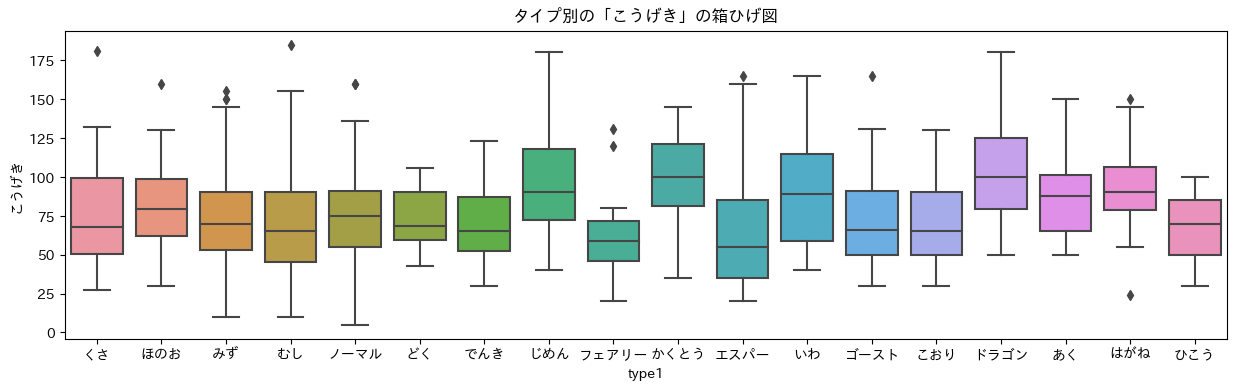

In [ ]:
# タイプ別の「こうげき」の箱ひげ図を描画
sns.boxplot(data=df_pokemon, x='type1', y='こうげき').set_title('タイプ別の「こうげき」の箱ひげ図')
plt.show()

### 一致性

- 一致性
  - 標本の大きさが大きくなるに従い、推定量が真の値に近づく性質
  - 全ての推定量が一致性を満たすとは限らない

### 一致性の確認：標本平均



`サンプルサイズが母集団のサイズに一致すると、標本平均は母平均に一致する`

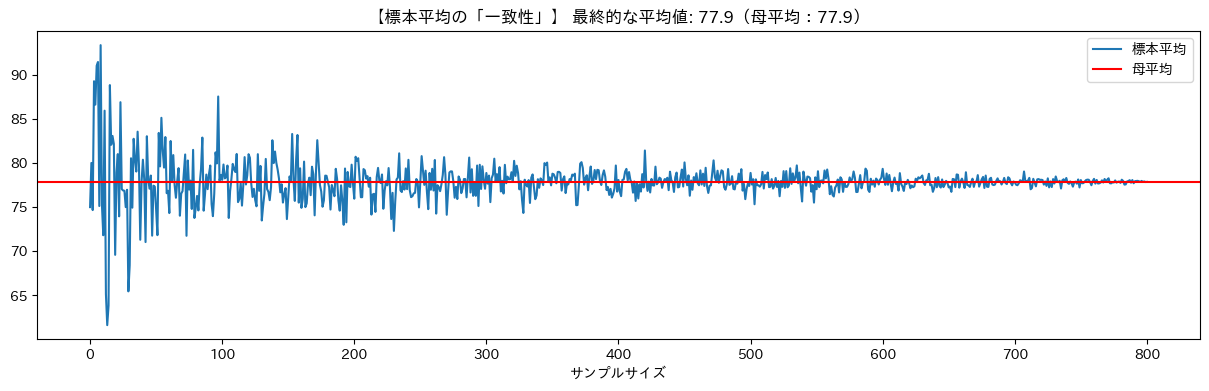

In [ ]:
# サンプルサイズごとの標本平均を格納する配列
means = np.empty(0, dtype=float)
# 母集団から取り出す標本のサイズの上限
sample_size = len(df_pokemon)

# 標本サイズを増やしながら処理を行う
for i in range(sample_size):
  # 母集団からサンプリング
  samples = df_pokemon.こうげき.sample(i+1)
  # 標本平均を計算して格納
  means = np.append(means, samples.mean())

# 標本平均の推移を描画
plt.plot(np.arange(len(samples)), means, label='標本平均')
# 母平均のラインを描画
plt.axhline(y = attack_pop_mean, color = 'r', linestyle = '-', label='母平均')
# タイトルを設定
plt.title(f'【標本平均の「一致性」】 最終的な平均値: {means[-1]:.1f}（母平均：{attack_pop_mean:.1f}）')
# 横軸のラベルを設定
plt.xlabel('サンプルサイズ')
# 凡例を表示
plt.legend()
# Figureオブジェクトを表示
plt.show()

### 一致性の確認：標本分散

`サンプルサイズが母集団のサイズに一致すると、標本分散は母分散に一致する`

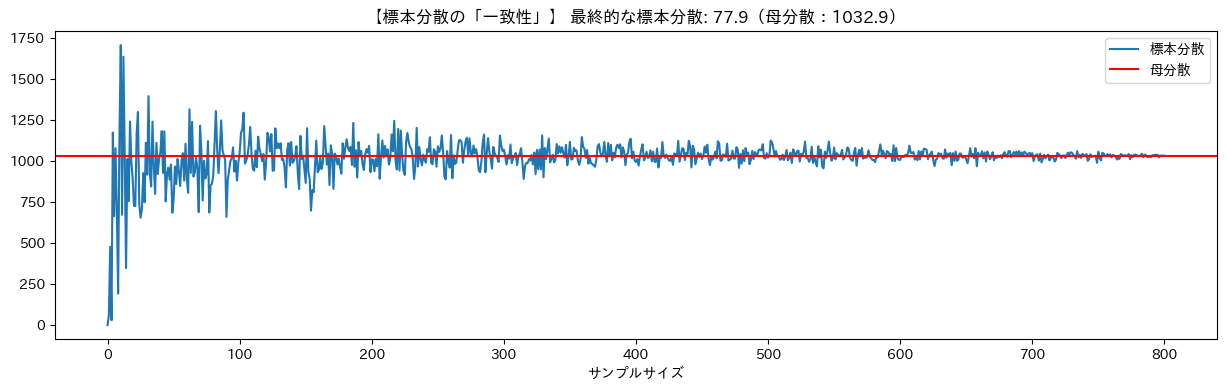

In [ ]:
# サンプルサイズごとの標本分散を格納する配列
vars = np.empty(0, dtype=float)
# 母集団から取り出す標本のサイズの上限
sample_size = len(df_pokemon.こうげき)

# 標本サイズを増やしながら処理を行う
for i in range(sample_size):
  # 母集団からサンプリング
  samples = df_pokemon.こうげき.sample(i+1, replace=False)
  # 標本分散を計算して格納
  vars = np.append(vars, samples.var(ddof=0))

# 標本分散の推移を描画
plt.plot(np.arange(len(vars)), vars, label='標本分散')
# 母分散のラインを描画
plt.axhline(y = attack_pop_var, color = 'r', linestyle = '-', label='母分散')
# タイトルを設定
plt.title(f'【標本分散の「一致性」】 最終的な標本分散: {means[-1]:.1f}（母分散：{attack_pop_var:.1f}）')
# 横軸のラベルを設定
plt.xlabel('サンプルサイズ')
# 凡例を表示
plt.legend()
# Figureオブジェクトを表示
plt.show()

### 不偏性

- 不偏性
  - 推定量が平均して（推定量の期待値が）母数に等しくなること
  - 推定量はサンプリングごとに揺らぐが、平均的に過大・過小の推定がないこと

### 不偏性：標本平均

- 標本平均は母平均に常に一致するとは限らない
- しかし、標本平均を求めるという操作を繰り返すと、得られる標本平均の平均は母平均に等しくなる
- したがって、標本平均は母平均を過大にも過小にも推定していない

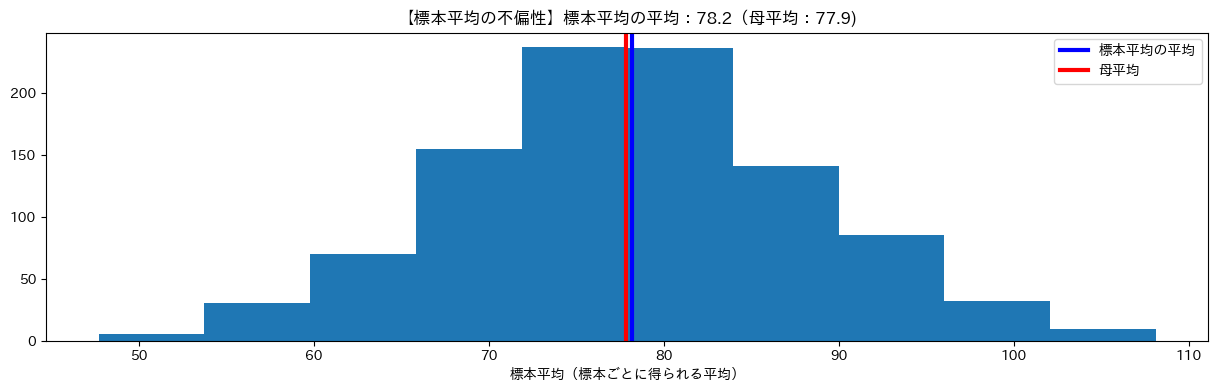

In [ ]:
# サンプルごとの標本平均を格納する配列
means = np.empty(0, dtype=float)
# 作成するサンプル数を設定
sample_num = 10**3
# 母集団から取り出す標本のサイズを設定
sample_size = 10

# 標本数分ループを回す
for _ in range(sample_num):
  # 母集団からサンプリング
  samples = df_pokemon.こうげき.sample(sample_size)
  # 標本平均を計算して格納
  means = np.append(means, samples.mean())

# ビンサイズを設定
num_bins = int(1 + np.log2(sample_num))
# 標本平均のヒストグラムを描画
plt.hist(means, bins=num_bins)#, density=True)
# 標本平均の平均のラインを描画
plt.axvline(means.mean(), color='blue', label='標本平均の平均', linewidth=3)
# 母平均のラインを描画
plt.axvline(attack_pop_mean, color='red', label='母平均', linewidth=3)
# タイトルを設定
plt.title(f'【標本平均の不偏性】標本平均の平均：{means.mean():.1f}（母平均：{attack_pop_mean:.1f})')
# 横軸のラベルを設定
plt.xlabel('標本平均（標本ごとに得られる平均）')
# 凡例の表示
plt.legend()
# Figureオブジェクトを表示
plt.show()

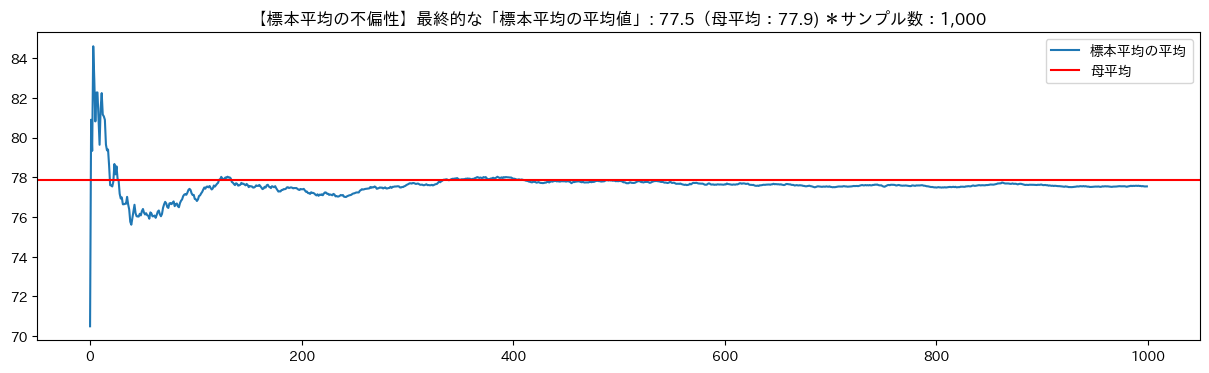

In [ ]:
# サンプルごとの標本平均を格納する配列
sample_means = np.empty(0, dtype=float)
# 標本平均の平均を格納する配列
sample_means_means = np.empty(0, dtype=float)
# 作成するサンプル数を設定
num_samples = 10**3
# 母集団から取り出す標本のサイズを設定
sample_size = 10

# 標本数分ループを回す
for _ in range(num_samples):
  # 母集団からサンプリング+標本平均の計算
  sample_mean = df_pokemon.こうげき.sample(sample_size).mean()
  # 標本平均を格納
  sample_means = np.append(sample_means, sample_mean)
  # 標本平均の平均を計算して格納
  sample_means_means = np.append(sample_means_means, sample_means.mean())

# 標本平均の平均の推移を描画
plt.plot(np.arange(num_samples), sample_means_means, label='標本平均の平均')
# 母平均のラインを描画
plt.axhline(y = attack_pop_mean, color = 'r', linestyle = '-', label='母平均')
# タイトルを設定
plt.title(f'【標本平均の不偏性】最終的な「標本平均の平均値」: {sample_means_means[-1]:.1f}（母平均：{attack_pop_mean:.1f}) ＊サンプル数：{num_samples:,}')
# 凡例の表示
plt.legend()
# Figureオブジェクトを表示
plt.show()

### 不偏性：標本分散

- 標本分散は母分散に常に一致するとは限らない
- しかも、標本分散を求めるという操作を繰り返した際に得られる標本分散の平均は母分散に等しくならない
- 標本分散は母分散を過小に推定する
  * ただし、このズレはサンプルサイズが小さい時に顕著になる一方で、十分に大きければ無視できる。

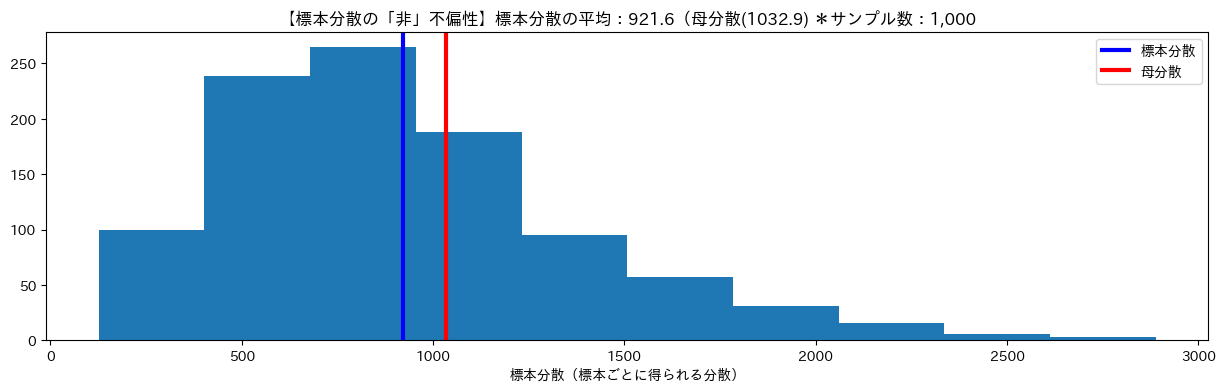

In [ ]:
# サンプルごとの標本分散を格納する配列
vars = np.empty(0, dtype=float)
# 作成するサンプル数を設定
sample_num = 10**3
# 母集団から取り出す標本のサイズを設定
sample_size = 10

# 標本数分ループを回す
for _ in range(sample_num):
  # 母集団からサンプリング
  samples = df_pokemon.こうげき.sample(sample_size)
  # 標本分散を計算して格納
  vars = np.append(vars, samples.var(ddof=0))

# ビンサイズを設定
num_bins = int(1 + np.log2(sample_num))
# 標本分散のヒストグラムを描画
plt.hist(vars, bins=num_bins)#, density=True)
# 標本分散の平均のラインを描画
plt.axvline(vars.mean(), color='blue', label='標本分散', linewidth=3)
# 母分散のラインを描画
plt.axvline(attack_pop_var, color='red', label='母分散', linewidth=3)
# タイトルを設定
plt.title(f'【標本分散の「非」不偏性】標本分散の平均：{vars.mean():.1f}（母分散({attack_pop_var:.1f}) ＊サンプル数：{num_samples:,}')
# 横軸のラベルを設定
plt.xlabel('標本分散（標本ごとに得られる分散）')
# 凡例の表示
plt.legend()
# Figureオブジェクトを表示
plt.show()

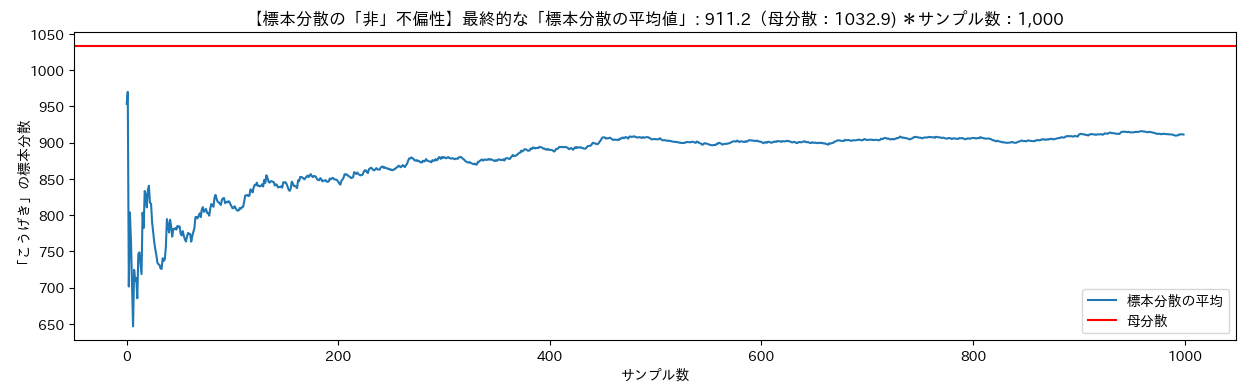

In [ ]:
# サンプルごとの標本分散を格納する配列
sample_vars = np.empty(0, dtype=float)
# 標本分散の平均を格納する配列
sample_vars_means = np.empty(0, dtype=float)
# 作成するサンプル数を設定
num_samples = 10**3
# 母集団から取り出す標本のサイズを設定
sample_size = 10

# 標本数分ループを回す
for _ in range(num_samples):
  # 母集団からサンプリング+標本分散の計算
  sample_var = df_pokemon.こうげき.sample(sample_size).var(ddof=0)
  # 標本分散を格納
  sample_vars = np.append(sample_vars, sample_var)
  # 標本分散の平均を計算して格納
  sample_vars_means = np.append(sample_vars_means, sample_vars.mean())

# 標本分散の平均の推移を描画
plt.plot(np.arange(num_samples), sample_vars_means, label='標本分散の平均')
# 母分散のラインを描画
plt.axhline(y=attack_pop_var, color = 'r', linestyle = '-', label='母分散')
# タイトルを設定
plt.title(f'【標本分散の「非」不偏性】最終的な「標本分散の平均値」: {sample_vars_means[-1]:.1f}（母分散：{attack_pop_var:.1f}) ＊サンプル数：{num_samples:,}')
# 横軸のラベルを設定
plt.xlabel('サンプル数')
# 縦軸のラベルを設定
plt.ylabel('「こうげき」の標本分散')
# 凡例の表示
plt.legend()
# Figureオブジェクトを表示
plt.show()

### 不偏分散 ($U^2$)

- 標本の分散（各データの`標本平均値`($\bar X$)からの散らばり具合）
- 平方和をn-1で割ったもの
- 母分散の不偏推定量
   $$U^2 = \frac{1}{n-1} \{ (X_1 - \bar X)^2 + (X_2 - \bar X)^2 + \dots + (X_n - \bar X)^2 \} = \frac{1}{n-1} \sum_{i=1}^{n}(X_i - \bar X)^2$$
   $$ \text{ここで、} n=\text{サンプルサイズ}$$


### 不偏性：不偏標本分散

- 標本不偏分散は母分散に常に一致するとは限らない
- しかし、不偏分散を求めるという操作を繰り返すと、得られる不偏分散の平均は母分散に等しくなる
- したがって、不偏分散は母分散を過大にも過小にも推定していない

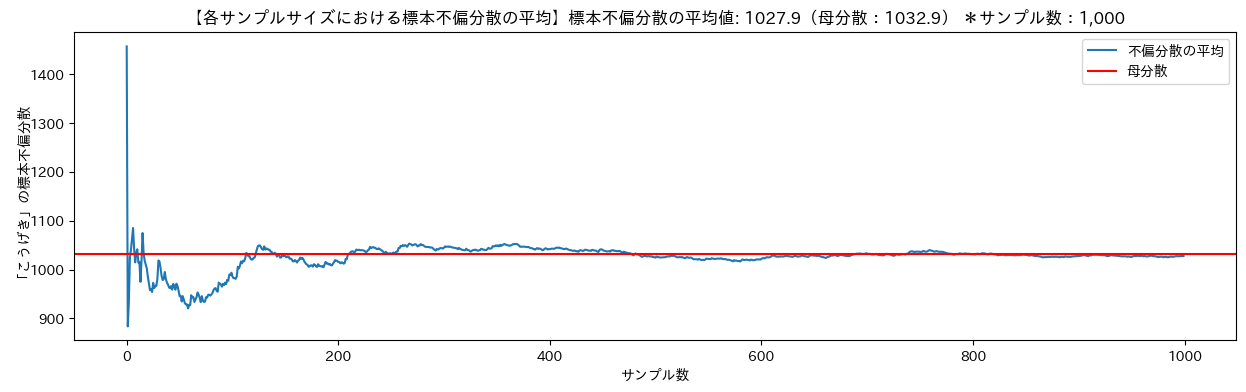

In [ ]:
# サンプルごとの標本分散を格納する配列
sample_vars = np.empty(0, dtype=float)
# 標本分散の平均を格納する配列
sample_vars_means = np.empty(0, dtype=float)
# 作成するサンプル数を設定
num_samples = 10**3
# 母集団から取り出す標本のサイズを設定
sample_size = 10

# 標本数分ループを回す
for _ in range(num_samples):
  # 母集団からサンプリング+標本分散の計算
  sample_var = df_pokemon.こうげき.sample(sample_size).var(ddof=1)
  # 標本分散を格納
  sample_vars = np.append(sample_vars, sample_var)
  # 標本分散の平均を計算して格納
  sample_vars_means = np.append(sample_vars_means, sample_vars.mean())

# 標本分散の平均の推移を描画
plt.plot(np.arange(num_samples), sample_vars_means, label='不偏分散の平均')
# 母分散のラインを描画
plt.axhline(y=attack_pop_var, color = 'r', linestyle = '-', label='母分散')
# タイトルを設定
plt.title(f'【各サンプルサイズにおける標本不偏分散の平均】標本不偏分散の平均値: {sample_vars_means[-1]:.1f}（母分散：{attack_pop_var:.1f}） ＊サンプル数：{num_samples:,}')
# 横軸のラベルを設定
plt.xlabel('サンプル数')
# 縦軸のラベルを設定
plt.ylabel('「こうげき」の標本不偏分散')
# 凡例の表示
plt.legend()
# Figureオブジェクトを表示
plt.show()

## 区間推定

- 標本平均と不偏分散を用いることで、標本から母平均が含まれる区間を推定することができる
- 95%信頼区間とは、同じ推定を何回も行った時に、推定区間に母平均が含まれる割合が100回中95回程度に期待される区間という意味
- 逆にいうと、95%信頼区間の推定では、100回に5回程度、間違った推定をすることになる


In [ ]:
# 標本サイズを設定
sample_size = 10
# 標本を取得
sample = df_pokemon.こうげき.sample(sample_size)
# 標本平均を計算
sample_mean = sample.mean()
# 標本不偏分散を計算
sample_uvar = sample.var(ddof=1)
# 自由度を計算
dof = sample_size - 1
# 95%信頼区間を計算
ci_low, ci_hight = stats.t.interval(0.95, dof, loc=sample_mean, scale=np.sqrt(sample_uvar/sample_size))
# 結果を表示
print(f'95%信頼区間：{ci_low:.1f}～{ci_hight:.1f}')
print(f'母平均：{attack_pop_mean:.1f}')

95%信頼区間：52.3～90.7
母平均：77.9


`信頼区間に母平均が含まれない推定が毎回5個程度出現する`


In [ ]:
# サンプルごとの標本平均を格納する配列
sample_means = np.empty(0, dtype=int)
# サンプルごとの信頼区間を格納する配列
confidence_intervals = np.empty(0, dtype=int)
# 作成するサンプル数
num_samples = 100
# 母集団から取り出す標本のサイズ
sample_size = 10

# 標本数分ループを回す
for _ in range(num_samples):
  # 母集団からサンプリング
  samples = df_pokemon.こうげき.sample(sample_size)
  # 標本平均を計算して格納
  sample_means = np.append(sample_means, samples.mean())
  # 標本不偏分散を計算
  sample_var = samples.std(ddof=1)
  # 信頼区間の下限と上限
  ci_low, ci_hight = stats.t.interval(0.95, dof, loc=sample_mean, scale=np.sqrt(sample_uvar/sample_size))
  # 信頼区間を格納
  confidence_intervals = np.append(confidence_intervals, (ci_hight-ci_low)/2)

# FigureとAxesオブジェクトをインスタンス化
fig, ax = plt.subplots(figsize=(15,3))
# 各格納結果を取り出し
for x, y, interval in zip(np.arange(sample_num), sample_means, confidence_intervals):
  # 信頼区間を描画
  ax.errorbar(x, y, interval, fmt='ko', capsize=4, ecolor='black')

# 母平均のラインを描画
ax.axhline(y=attack_pop_mean, color = 'r', linestyle = '-')
# 横軸の目盛を設定
ax.set_xticks(ticks=np.arange(num_samples))
plt.xticks(rotation=90)
# タイトルを設定
fig.suptitle(f'{num_samples}回の試行ごとに得られる95%信頼区間')
# Figureオブジェクトを表示
plt.show()

## 仮説検定

- 帰無仮説
  - 示したい仮説の否定命題
- 対立仮説
  - 示したい仮説

### 仮説検定：母平均に関する検定①

- 帰無仮説
  - 「こうげき」の母平均は80である
- 対立仮説
  - 「こうげき」の母平均は80でない

In [ ]:
print(f'母平均: {attack_pop_mean:.2f}')
# 標本サイズを設定
sample_size = 100
# 標本を取得
sample = df_pokemon.こうげき.sample(sample_size)
# 標本平均を計算
sample_mean = sample.mean()
print(f'標本平均: {sample_mean:.2f}')
# 自由度を計算
dof = sample_size - 1
# t-検定を実行
result = stats.ttest_1samp(sample, 80)
print(f't統計量: {result[0]:.2f}')
print(f'p値: {result[1]:.2f}')

- $p<0.05$　`帰無仮説を棄却`し`対立仮説を採択`

- $p\ge0.05$　帰無仮説を棄却せず`判断を保留`


### 仮説検定：母平均に関する検定②

- 帰無仮説
  - 「こうげき」の母平均は90である
- 対立仮説
  - 「こうげき」の母平均は90でない

In [ ]:
print(f'母平均: {attack_pop_mean:.2f}')
# 標本サイズを設定
sample_size = 100
# 標本を取得
sample = df_pokemon.こうげき.sample(sample_size)
# 標本平均を計算
sample_mean = sample.mean()
print(f'標本平均: {sample_mean:.2f}')
# 自由度を計算
dof = sample_size - 1
# t-検定を実行
result = stats.ttest_1samp(sample, 100)
print(f't統計量: {result[0]:.2f}')
print(f'p値: {result[1]:.2e}')

- $p<0.05$　`帰無仮説を棄却`し`対立仮説を採択`

- $p\ge0.05$　帰無仮説を棄却せず`判断を保留`


### 仮説検定：母平均の差の検定③

- 帰無仮説
  - 「こうげき」と「ぼうぎょ」の母平均は等しい
- 対立仮説
  - 「こうげき」と「ぼうぎょ」の母平均は等しくない
- サンプルサイズ: 100

In [ ]:
print(f'「こうげき」の母平均: {attack_pop_mean:.2f}')
print(f'「ぼうぎょ」の母平均: {df_pokemon.ぼうぎょ.mean():.2f}')

# 標本サイズを設定
sample_size = 100
# 標本を取得
sample1 = df_pokemon.こうげき.sample(sample_size)
sample2 = df_pokemon.ぼうぎょ.sample(sample_size)
# 標本平均を計算
sample_mean1 = sample1.mean()
print(f'「こうげき」の標本平均: {sample_mean1}')
sample_mean2 = sample2.mean()
print(f'「ぼうぎょ」の標本平均: {sample_mean2}')
result = stats.ttest_ind(sample1, sample2)
print(f't統計量: {result[0]:.2f}')
print(f'p値: {result[1]:.2f}')

- $p<0.05$　`帰無仮説を棄却`し`対立仮説を採択`

- $p\ge0.05$　帰無仮説を棄却せず`判断を保留`


### 仮説検定：母平均の差の検定④

- 帰無仮説
  - 「こうげき」と「ぼうぎょ」の母平均は等しい
- 対立仮説
  - 「こうげき」と「ぼうぎょ」の母平均は等しくない
- サンプルサイズ: 500

In [ ]:
print(f'「こうげき」の母平均: {attack_pop_mean:.2f}')
print(f'「ぼうぎょ」の母平均: {df_pokemon.ぼうぎょ.mean():.2f}')

# 標本サイズを設定
sample_size = 500
# 標本を取得
sample1 = df_pokemon.こうげき.sample(sample_size)
sample2 = df_pokemon.ぼうぎょ.sample(sample_size)
# 標本平均を計算
sample_mean1 = sample1.mean()
print(f'「こうげき」の標本平均: {sample_mean1:.2f}')
sample_mean2 = sample2.mean()
print(f'「ぼうぎょ」の標本平均: {sample_mean2:.2f}')
result = stats.ttest_ind(sample1, sample2)
print(f't統計量: {result[0]:.2f}')
print(f'p値: {result[1]:.2f}')

- $p<0.05$　`帰無仮説を棄却`し`対立仮説を採択`

- $p\ge0.05$　帰無仮説を棄却せず`判断を保留`
